In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from scipy import signal

from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
%matplotlib inline
%run 'tf.py'

In [ ]:
# test wave
p_num = 1000
x = np.linspace(0, 1, p_num)

ten = np.linspace(0.2, 1, 10)
y = np.concatenate((ten, ten[::-1], ten, ten[::-1]))
y = np.tile(y, 25)

x, y = tf(x, y)

# plot_ekg(x, y)

In [279]:
# some health data fro QS app
hd = pd.read_csv('health_data.csv')
hd = hd.loc[:716]

hd['rcs'] = minmax_scale(hd['Resting Calories (kcal)'], (0.1, 1))
#plot(hd['rcs'], 'r-')

x, y = tf(hd.index, hd['rcs'])
#plot_ekg(x, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [5]:
# extracted from svg by https://shinao.github.io/PathToPoints/
ekg = pd.read_csv('ekg.csv', names=['x', 'y'])
#plot_ekg(ekg.x, ekg.y)

In [5]:
ps = read_svg('./tf/ekg.svg', 1000)
#ps

set_xmlns_serif not found in:svg


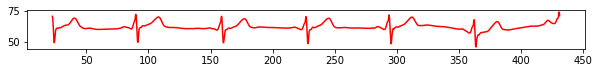

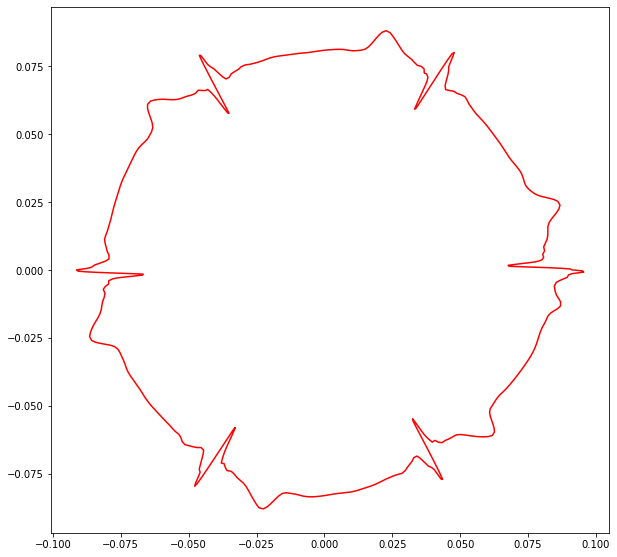

In [6]:
x, y = try_tf(ps.real, ps.imag, 25, 592, (0.4, 0.6))

In [8]:
xys = ps[25:592]
x, y = xys.real, xys.imag

x, y = tf(x, y, (0.4, 0.6))

# convert back to real+imag
z = np.zeros((len(x)), dtype=complex)
# scale by factor 5000
z.real, z.imag = x * 5000, y * 5000
# test if conversion was correct
#x, y = plot_ekg(z.real, z.imag)

# create new svg.path Path
new_path = Path()
# move to start
new_path.insert(0, Move(z[0]))

# insert points
for i, start, end in zip(range(1, len(z)-1), z[:-1], z[1:]):
    new_path.insert(i, Line(start, end))

# close path
new_path.insert(len(z), Line(z[-1], z[0]))
new_path.closed = True

# load old svg and edit to create circular one
f2 = pysvg.parser.parse('./tf/ekg.svg')

# get g
g = f2._subElements[0]
# remove transform
g.set_transform('')

# get path
p = g._subElements[0]
# set d in path Svg->G->Path
p.setAttribute('d', new_path.d())
# edit stroke-width
p.setAttribute('style', 'fill:none;fill-rule:nonzero;stroke:rgb(205,10,32);stroke-width:3px;')

# set viewBox
f2.setAttribute('viewBox', '-750 -750 1500 1500')

# save file
f2.save('./tf/new_path.svg')
    

set_xmlns_serif not found in:svg


In [16]:
## Spiral transformation


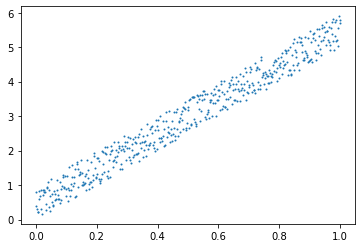

In [9]:
num = 500
t = np.linspace(0, 1, num)
#y = signal.sawtooth(2 * np.pi * 5 * t, width=0.5)
y = np.zeros(num)

y = y + np.random.random_sample((num,))

y = y + t * 5

plt.scatter(t, y, s=1)

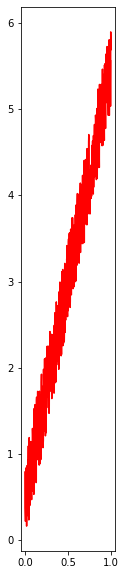

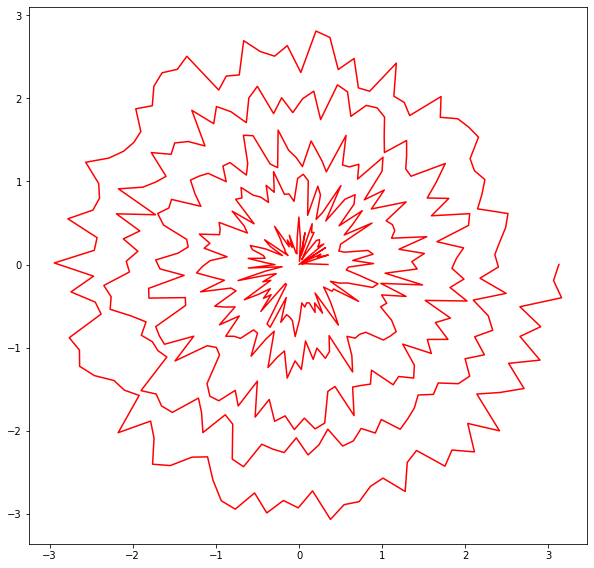

In [10]:
_, _ = try_tf_spiral(t, y, turns=5, start=0, x_scale=(0, 100), y_scale=(0, 100))


In [47]:
%run 'tf.py'

In [48]:
f = pysvg.parser.parse('./data/graph_reduced-2.svg')
circles = f.getElementsByType(pysvg.shape.Circle)

set_xmlns not found in:style


In [49]:
# load old svg and edit to create circular one
f3 = pysvg.parser.parse('./svg/blank.svg')

# get g
g = f3._subElements[0]
# remove transform
g.set_transform('')

# get path
#p = g._subElements[0]
# set d in path Svg->G->Path
#p.setAttribute('d', new_path.d())
# edit stroke-width
#p.setAttribute('style', 'fill:none;fill-rule:nonzero;stroke:rgb(205,10,32);stroke-width:3px;')

xmax = max([float(c.getAttribute('cx')) for c in circles])

for c in circles:
    g.addElement(move_circle(c, xmax))

# set viewBox
f3.setAttribute('viewBox', '-750 -750 1500 1500')

# save file
f3.save('./svg/graph.svg')

set_xmlns_serif not found in:svg


In [44]:
def move_circle(c, xmax):
    cx = c.getAttribute('cx')
    cy = c.getAttribute('cy')

    x, y = tf_spiral_single(float(cx), float(cy), turns=5, xmax=xmax)

    c.setAttribute('cx', x)
    c.setAttribute('cy', y)
    return c